In [2]:
## hand written digit classification
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm #shows progress bar while training

In [12]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

In [13]:
## we have 60000 images..for training
train_images.shape

(60000, 28, 28, 1)

In [14]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''') 

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''')

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # [TODO Dense layer to output classification probabilities]
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [15]:
## train and test the cnn model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
# parameters
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS,validation_split=0.2, shuffle=True)

Epoch 1/5
750/750 [==============================] - 39s 50ms/step - loss: 0.2167 - accuracy: 0.9355 - val_loss: 0.0878 - val_accuracy: 0.9740
Epoch 2/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0594 - accuracy: 0.9810 - val_loss: 0.0512 - val_accuracy: 0.9843
Epoch 3/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0408 - accuracy: 0.9870 - val_loss: 0.0412 - val_accuracy: 0.9879
Epoch 4/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0380 - val_accuracy: 0.9894
Epoch 5/5
750/750 [==============================] - 36s 49ms/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0397 - val_accuracy: 0.9887


In [17]:
# test loss
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0321 - accuracy: 0.9901
Test accuracy: 0.9901000261306763


In [18]:
# make predections using CNN
predictions = cnn_model.predict(test_images)

In [19]:
predictions[0]

array([1.4188130e-09, 2.8402017e-11, 1.1424802e-08, 3.4053135e-06,
       6.6185681e-12, 1.2076032e-10, 9.7443846e-16, 9.9999642e-01,
       3.8382479e-09, 5.6489089e-08], dtype=float32)

In [20]:
# max value of softmax is predection
prediction = np.argmax(predictions[0]) 

print(prediction)

7


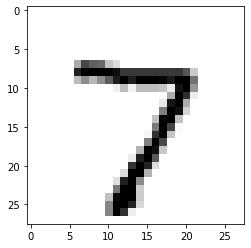

In [22]:
# images at zero position
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)